- 提示：
    - 本主题都是基于图像处理，实际上Mat表示的是矩阵，包括矩阵的运算，以及向量表示，多维矩阵表示等。

# 构造器的使用

## 基本构造器使用

1. 构造器定义

```C++

cv::Mat::Mat(	
    int rows,
    int cols,
    int type,
    void * data,
    size_t step=AUTO_STEP 
)
```

2. 参数说明
    1. `int rows`：矩阵的行数（如果是图像，表示像素个数）；
    2. `int cols`：矩阵的列数
    3. `int type`：矩阵元素的数据类型，数据类型是使用宏预定义的：
        - 宏定义可以使用通道，通道数1-4（用来对应颜色的RGBA），具体的宏的定义见下面的说明。
    4. `void * data`：用来填充矩阵的数据内存（使用指针指向数据缓冲的地址）
    5. `size_t step=AUTO_STEP`：矩阵行的字节数（默认AUTO_STEP就是元素类型长度`*`cols），单位：字节bytes
        - 默认参数AUTO_STEP的计算方式：`cols*elemSize()`：简易采用默认参数。
        - AUTO_STEP是枚举类型，表示0。

3. 矩阵数据类型的宏：
    1. 基本类型：
        - `#define 	CV_8U   0`
        - `#define 	CV_8S   1`
        - `#define 	CV_16U   2`
        - `#define 	CV_16S   3`
        - `#define 	CV_32S   4`
        - `#define 	CV_32F   5`
        - `#define 	CV_64F   6`
        - `#define 	CV_16F   7`
    2. 带通道的宏
        - 格式：类型Cn,其中的n表示1，2，3，4，例子：`CV_8UC1`，`CV_8UC2`，`CV_8UC3`，`CV_8UC4`
        - 这样8个基本类型，每个可以带4个通道。一共可以使用32个，类型。
        - 带通道的类型定义如下：
            - `#define 	CV_8UC1   CV_MAKETYPE(CV_8U,1)`

4. OpenCV自带的数据定义：
    - `typedef uint32_t 	uint`
    - `typedef signed char 	schar`
    - `typedef unsigned char 	uchar`
    - `typedef unsigned short 	ushort`
    - `typedef int64_t 	int64`
    - `typedef uint64_t 	uint64`

4. 使用例子

- GUI代码:main.cpp

```C++
    #include <QApplication>
    #include <QDialog>
    #include <QLabel>
    // #include <QImage>    // 不需要引入
    // #include <QPixmap>
    ////////////////////////////////
    #include <opencv2/opencv.hpp>
    ///////////////////////////////
    #include "./m01_constructor/m01_constructor.h"

    #include <iostream>

    int main(int argc, char* argv[]) {
        // 初始化QT应用
        QApplication app(argc, argv);
        // 创建一个对话框
        QDialog  dlg;
        // 设置对话框大小
        dlg.setWindowTitle("OpenCV之Mat图像表示");
        dlg.setGeometry(100,100,400,300);

        // 显示图片的标签框
        QLabel lbl_image("显示图片", &dlg); // 以dlg作为父窗体
        // 图片框大小位置
        lbl_image.setGeometry(0,0, 400,300);


        /* 图像显示 */
        cv::Mat src_image;
        cv::Mat image;
        ////////////////////////////////////
        src_image = create_matrix();    // 调用矩阵构造函数
        ////////////////////////////////////
        // 转换图像颜色空间
        cv::cvtColor(src_image, image, cv::COLOR_BGRA2RGBA);  // opencv读取数据的格式是BGRA，需要转换为QT能处理的格式
        // 把图像转换: cv::Mat -> QImage -> QPixmap -> 设置到QLabel
        const uchar *u_image = image.data;
        QImage img_buffer(u_image, image.cols, image.rows, QImage::Format_RGBA8888);
        QPixmap img_map = QPixmap::fromImage(img_buffer);
        lbl_image.setPixmap(img_map);


        lbl_image.setScaledContents(true);
        // std::cout<< image.dims<<std::endl;
        // std::cout<< image.depth()<<std::endl;
        dlg.show();
        return app.exec();
    }

```

- Mat对象创建头文件：`m01_constructor.h`，使用单独的目录存放，目录名也是：m01_constructor

```C++
    #ifndef M01_CONSTRUCTOR_H
    #define M01_CONSTRUCTOR_H
    #include <opencv2/opencv.hpp>

    cv::Mat create_matrix();
    #endif
```

- Mat对象创建实现文件：`m01_constructor.cpp`，与对应头文件放在同一目录。

```C++
    #include "m01_constructor.h"
    cv::Mat create_matrix(){
        int rows = 300;             // 图像高度
        int cols = 400;             // 图像宽度
        int type = CV_8UC4;         // 像素类型（宏没有命名空间）
        uchar *data = new uchar[rows * cols * 4];  // 像素4通道unsigned char（0-255之间）；
        /* data暂时不初始化，使用分配时的脏数据 */
        /* data初始化 */
        bzero(data, rows * cols * 4);  // 初始化为0(透明的黑色)
        // memset(data, 255, rows * cols * 4);   // 全部初始化为255，不透明的白色
        // 循环初始化（4通道中第1通道与第4通道为255，其他为0）
        for(int idx=0; idx <rows * cols * 4/2; idx++){   // 初始化一半
            if(idx % 4 == 0 || idx % 4 == 3){
                data[idx] = 255;
            }
        }
        cv::Mat  img(rows, cols, type, data, cv::Mat::AUTO_STEP);   // AUTO_STEP定义在Mat类内部的
        return img;
        /*
            data不用释放，由cv::Mat管理；
         */
    }

```

5. 数据产生的图像
    - 注意：Mat表示图像，颜色顺序式`B G R A`
    
    
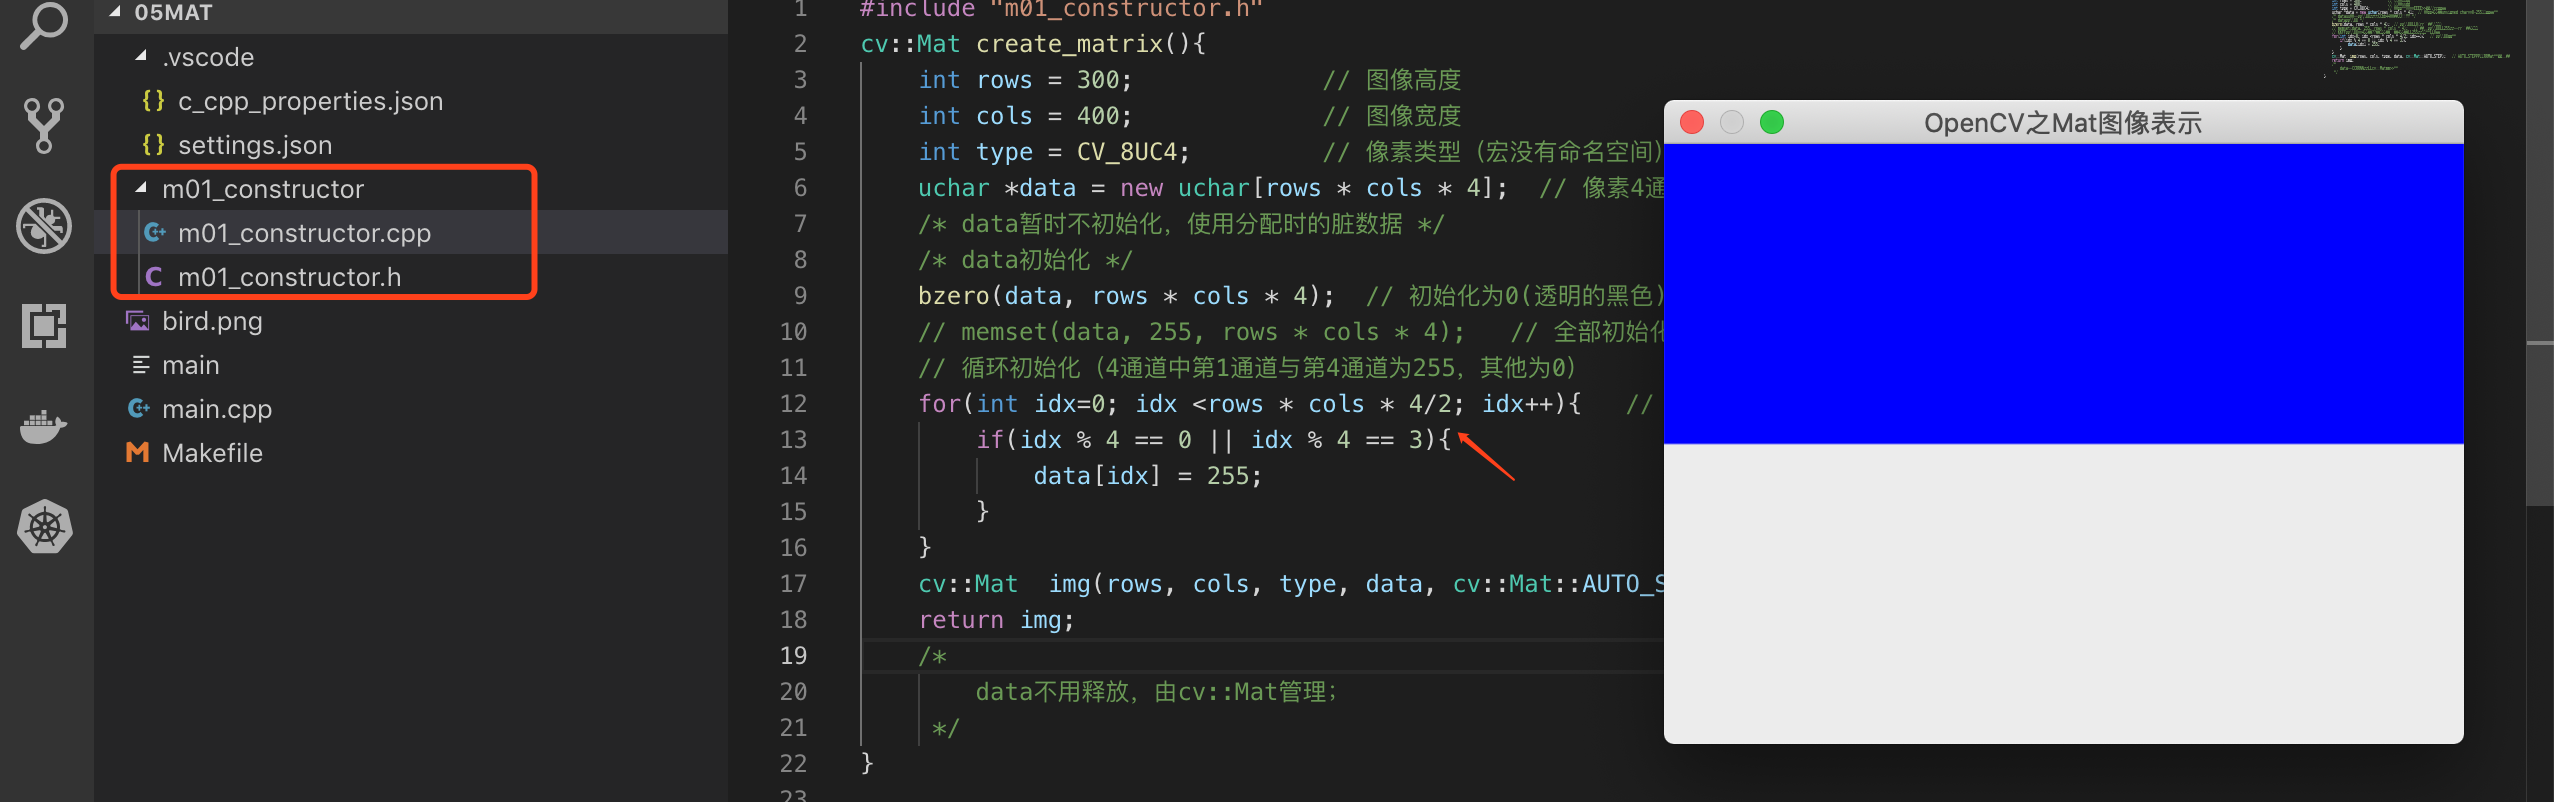

## 重载构造器

- 其他的构造器除了拷贝构造器外，都是上面基本构造器的重载类型：
    - 重载的方式主要是使用不同的方式，给用户提供更多的方便。比如：
        1. 高宽使用一个Size替代。
        2. 数据使用Scalar替代。(Scalar是4个元素的double数组，从vector继承)
        3. data使用默认值；
        4. 高宽使用std::vector替代；
        5. 数据使用std::vector替代；
        6. 数据使用std::array替代；（简单数据直接使用Point_与Point3_替代）
    - 类似功能的重载构造器如下（只列出部分，其他参考官方文档）：
        - `Mat ()`
        - `Mat (int rows, int cols, int type)`
        - `Mat (Size size, int type)`
        - `Mat (int rows, int cols, int type, const Scalar &s)`
        - `Mat (Size size, int type, const Scalar &s)`
        - `Mat (int ndims, const int *sizes, int type)`
        - `Mat (const std::vector< int > &sizes, int type)`
        - `Mat (int ndims, const int *sizes, int type, const Scalar &s)`
        - `Mat (const std::vector< int > &sizes, int type, const Scalar &s)`
        - `Mat (const Mat &m)`
        - `Mat (int rows, int cols, int type, void *data, size_t step=AUTO_STEP)`
        - `Mat (Size size, int type, void *data, size_t step=AUTO_STEP)`
        - `Mat (int ndims, const int *sizes, int type, void *data, const size_t *steps=0)`
        - `Mat (const std::vector< int > &sizes, int type, void *data, const size_t *steps=0)`

- 重载构造器使用例子

```C++
#include "m01_constructor.h"
cv::Mat create_matrix(){
    int rows = 300;             // 图像高度
    int cols = 400;             // 图像宽度
    int type = CV_8UC4;         // 像素类型（宏没有命名空间）
    cv::Scalar pixel(0,255,0, 255);
    cv::Mat  img(rows, cols, type, pixel); 
    return img;
    /*
        data不用释放，由cv::Mat管理；
     */
}

```

# 数据属性

## 行列

1. 属性：
    1. `int cols`
    2. `int rows`
2. 相关函数
    - 无

## 数据

1. 属性：
    - `uchar * 	data`
2. 相关函数：
    - `uchar * 	ptr (int i0=0)`
        - 参数使用默认的0，表示第一行的数据位置。

## 维度

- `int 	dims`

## 标记位

- `int 	flags`：标记位，可以使用位运算获取，标记位包含如下信息：
    - the magic signature：魔法签名
    - continuity flag：连续性标记
    - depth：深度
    - number of channels：通道数

## 其他属性

1. `MatSize 	size`
2. `MatStep 	step`
3. `UMatData * 	u`

## 使用函数可以访问的属性

1. `int channels () const`
    - 通道数
2. `int depth () const`
    - 深度原色基本类型，如下几种，不包含通道信息：
        - 0：`CV_8U - 8-bit unsigned integers ( 0..255 )`
        - 1：`CV_8S - 8-bit signed integers ( -128..127 )`
        - 2：`CV_16U - 16-bit unsigned integers ( 0..65535 )`
        - 3：`CV_16S - 16-bit signed integers ( -32768..32767 )`
        - 4：`CV_32S - 32-bit signed integers ( -2147483648..2147483647 )`
        - 5：`CV_32F - 32-bit floating-point numbers ( -FLT_MAX..FLT_MAX, INF, NAN )`
        - 6：`CV_64F - 64-bit floating-point numbers ( -DBL_MAX..DBL_MAX, INF, NAN )`
3. `size_t elemSize () const`
    - 每个元素的字节数。
4. `size_t elemSize1 () const`
    - 每个通道的字节数；
5. `bool empty () const`
    - 判定数据是否为空；
6. `size_t total () const`
    - 返回数组的元素个数；
7. `int type () const`
    - 返回矩阵元素的类型；该类型不是C++的数据类型，是上面讲述的带通道信息的类型。

- 下面是属性的例子，可以直观体会。

```C++

    // 测试Mat的属性：
    std::cout<<"行列：（" << src_image.rows << ","<< src_image.cols <<")"<<std::endl;
    std::cout<<"维度，通道与深度：（" << src_image.dims << "," << src_image.channels() << "," << src_image.depth() << ")" <<std::endl;
    std::cout<<"类型："<< src_image.type() <<", 是否是CV_8UC4？" <<(CV_8UC4 == src_image.type()) << std::endl;
    std::cout<<"元素字节数，通道字节数，总的元素个数：" << src_image.elemSize() <<","<< src_image.elemSize1() << "," << src_image.total() <<std::endl;
    // std::cout<<"："<<0<<std::endl;

```

- 输出结果如下：

```bash
localhost:05Mat yangqiang$ ./main
行列：（300,400)
维度，通道与深度：（2,4,0)
类型：24, 是否是CV_8UC4？1
元素字节数，通道字节数，总的元素个数：4,1,120000
localhost:05Mat yangqiang$ 
```

## flags属性的使用

1. flags属性包含的数据：
    - `the magic signature`
    - `continuity flag`
    - `depth`
    - `number of channels`
        - 就是type标记位，需要处理下才能得到通道数（位运算）。

2. 位遮罩
    - `MAGIC_MASK = 0xFFFF0000, `
    - `TYPE_MASK = 0x00000FFF, `
        - `int 	type () const`
    - `DEPTH_MASK = 7 `
        - `int 	depth () const`
    - `CONTINUOUS_FLAG = CV_MAT_CONT_FLAG`
        - `bool 	isContinuous () const`

3. 使用例子

```C++
    int flags = src_image.flags;
    std::cout << "标记值：" << flags << std::endl;
    std::cout << "魔法值：" << (flags & cv::Mat::MAGIC_MASK) << "," << cv::Mat::MAGIC_VAL << std::endl;  
    std::cout << "深度值：" << (flags & cv::Mat::DEPTH_MASK) << "," << CV_8U << std::endl;  
    std::cout << "类型值：" << (flags & cv::Mat::TYPE_MASK) << "," << CV_8UC4 << std::endl;  
    // 矩阵是否连续，flags & cv::Mat::CONTINUOUS_FLA 不等于0都是连续的。
    std::cout << "连续值：" << (flags & cv::Mat::CONTINUOUS_FLAG) << "," << cv::Mat::CONTINU
```

# 数据访问

## at函数

- at函数返回Mat矩阵中数据的引用（这意味着可以直接修改，并影响到矩阵中的数据元素）。
    - 根据矩阵的维数，提供了常用的向量（一维）矩阵(一个参数)，二维矩阵（两个参数），三维矩阵支持（三个参数）。
    - 多维矩阵的访问，直接使用`int *`与`Vec`参数来访问多维。
    - 因为Mat经常用于图像，所以提供了Point参数访问元素。

1. at函数的基本声明

```C++
    template<typename _Tp > _Tp & at (int row, int col)
```

2. at函数的重载声明
    -  `template<typename _Tp > _Tp & at (int i0=0)`
    -  `template<typename _Tp > const _Tp & at (int i0=0) const`
    -  `template<typename _Tp > _Tp & at (int row, int col)`
    -  `template<typename _Tp > const _Tp & at (int row, int col) const`
    -  `template<typename _Tp > _Tp & at (int i0, int i1, int i2)`
    -  `template<typename _Tp > const _Tp & at (int i0, int i1, int i2) const`
    -  `template<typename _Tp > _Tp & at (const int *idx)`
    -  `template<typename _Tp > const _Tp & at (const int *idx) const`
    -  `template<typename _Tp , int n>_Tp & at (const Vec< int, n > &idx)`
    -  `template<typename _Tp , int n>const _Tp & at (const Vec< int, n > &idx) const`
    -  `template<typename _Tp >_Tp & at (Point pt)`
    -  `template<typename _Tp >const _Tp & at (Point pt) const`

3. 关于元访问的封装
    - 在opencv中提供了Vec模板类来封装矩阵元素的访问，尤其是3这种无法对齐的数据，访问起来特别方便。
        - Vec从cv::Matx类。
        - 模板:`Vec< T, cn > () const`
            - T ：数据类型
            - cn ： 元素个数。
        - 提供`[ ]`运算符，用来访问Vec中的元素。 

4. at函数的使用例子
    - 把蓝色通道设置为0；

```C++
    void access_at(cv::Mat &mat){
        int rows = mat.rows;
        int cols = mat.cols;
        int channels = mat.channels();  // 三通道
        int depth = mat.depth();
        std::cout<< depth << "," << channels << std::endl;
        for(int y = 0; y < rows; y++){
            for(int x = 0; x < cols; x++){
                cv::Vec<u_char, 3>& pixel = mat.at<cv::Vec<u_char, 3> >(y, x);
                // std::cout<<(unsigned int)pixel[0]<< ",";
                // std::cout<<(unsigned int)pixel[1]<< ",";
                // std::cout<<(unsigned int)pixel[2]<< ",";
                // std::cout<<std::endl;
                pixel[0] = 0;   // B把蓝色通道设置为0
                // pixel[1] = 0;   // G绿色通道
                // pixel[2] = 0;   // R红色通道

            }
        }
    }

```

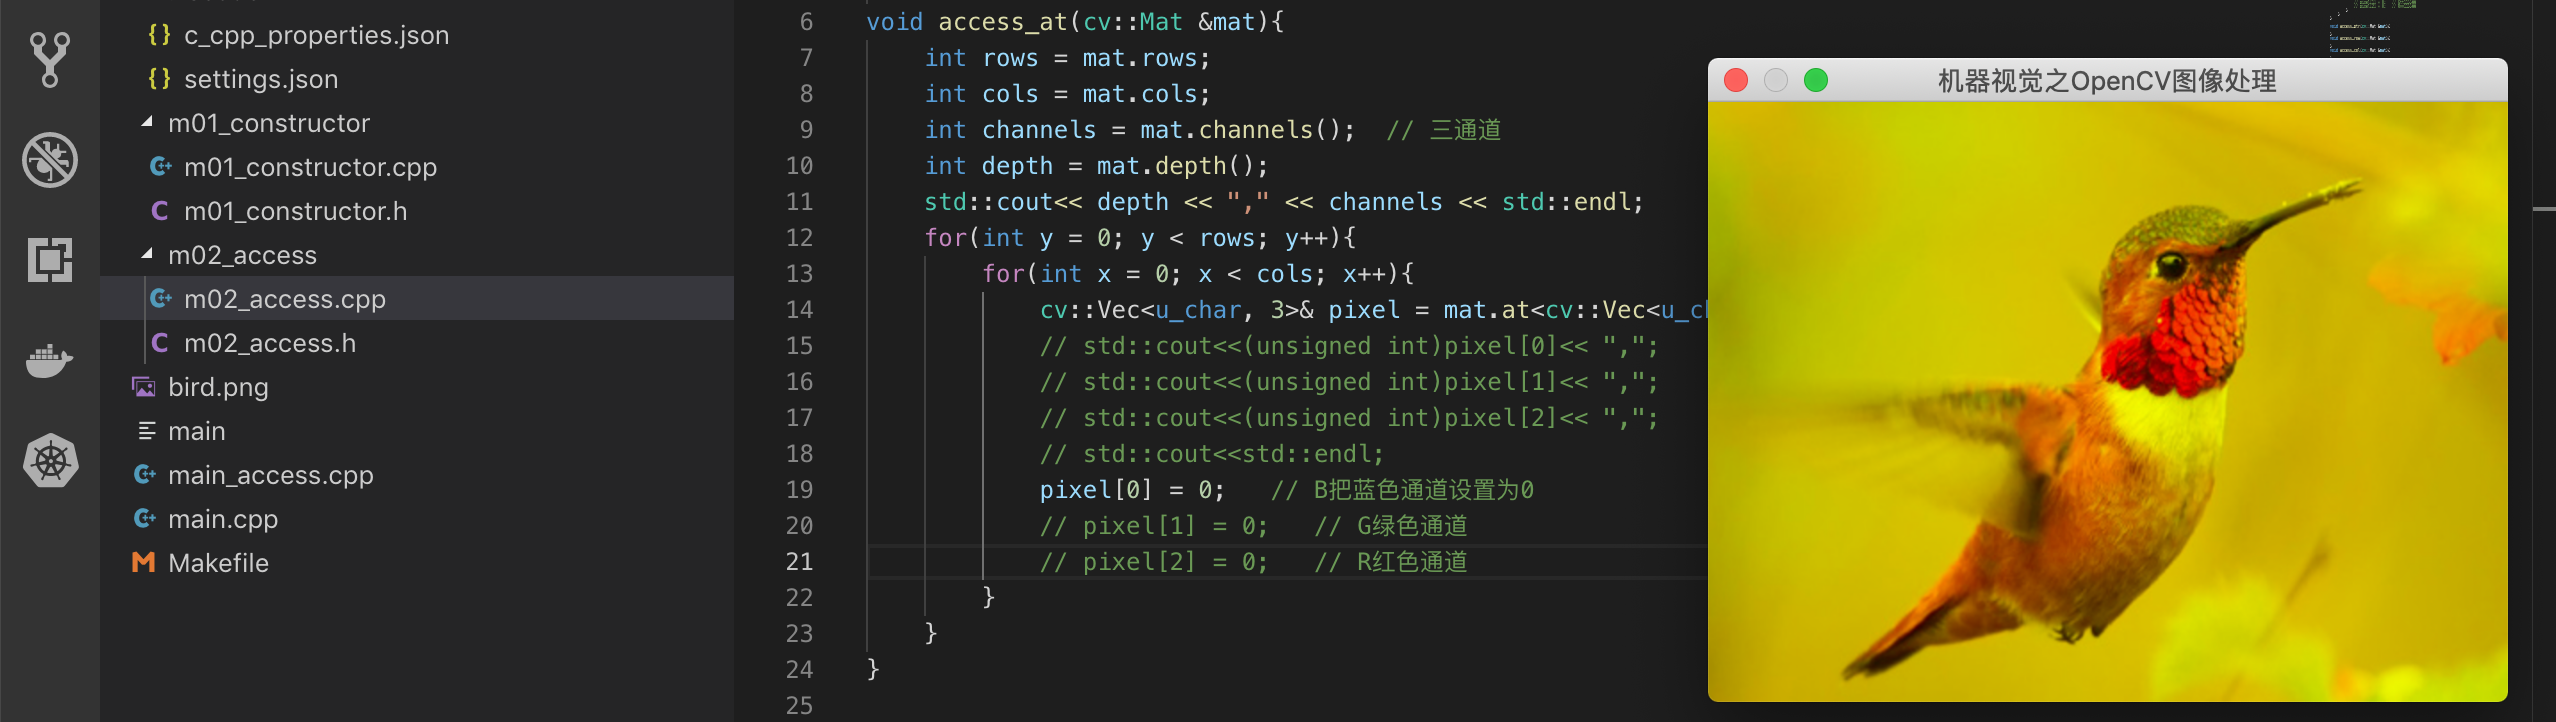

## ptr函数

- ptr与at函数一样，唯一的差别返回元素的地址。
    - `uchar * ptr (int row, int col)`

- ptr使用例子：
    - 该例子与上面例子完全一样。

```C++
    void access_ptr(cv::Mat &mat){
        int rows = mat.rows;
        int cols = mat.cols;
        for(int y = 0; y < rows; y++){
            for(int x = 0; x < cols; x++){
                cv::Vec<u_char, 3>* pixel = mat.ptr<cv::Vec<u_char, 3> >(y, x);
                (*pixel)[0] = 0;   // B把蓝色通道设置为0
            }
        }
    }
```

## row/col与rowRange/colRange函数

- row返回矩阵中的指定一行
- rowRangle返回矩阵中的指定多行（开始行，结束行）
    - 不包含结束行。

1. row函数使用例子

```C++
    void access_row(cv::Mat &mat){
        int rows = mat.rows;
        int cols = mat.cols;
        for(int y = 0; y < rows; y++){
            cv::Mat row = mat.row(y);
            for(int x = 0; x < cols; x++){
                cv::Vec<u_char, 3>& pixel = row.at<cv::Vec<u_char, 3> >(x);
                pixel[0] = 0;   // B把蓝色通道设置为0
            }
        }
    }
```

2. rowRange使用例子

```C++
    void access_row(cv::Mat &mat){
        int rows = mat.rows;
        int cols = mat.cols;
        // 取部分矩阵
        cv::Mat part_mat = mat.rowRange(100,200); 

        for(int y = 0; y < 100; y++){   // 注意不要越界
            cv::Mat row = part_mat.row(y);
            for(int x = 0; x < cols; x++){
                cv::Vec<u_char, 3>& pixel = row.at<cv::Vec<u_char, 3> >(x);
                pixel[0] = 0;   // B把蓝色通道设置为0
                pixel[1] = 0;   // B把蓝色通道设置为0
            }
        }
    }
```

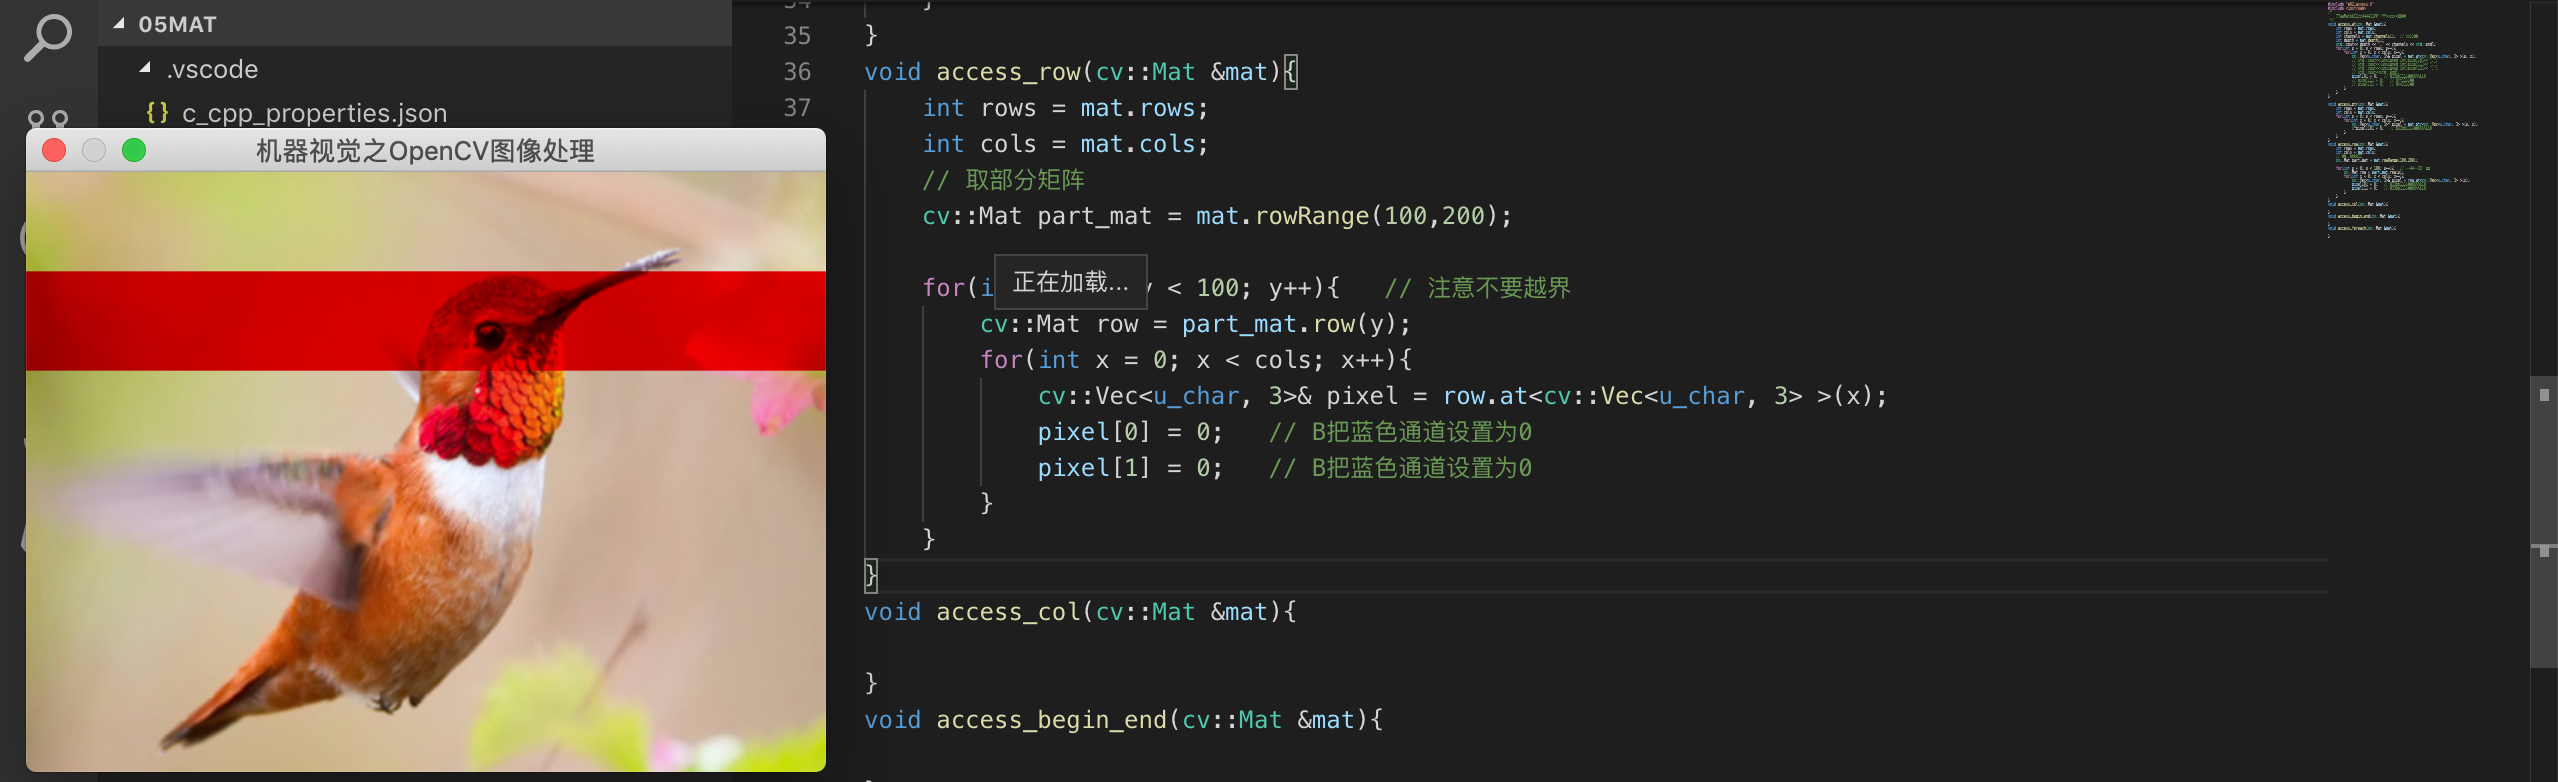

## begin与end函数

- 这里需要迭代器相关知识。

1. begin函数定义：
    - 模板函数。
    - end函数类似。

```C++
template<typename _Tp > MatConstIterator_< _Tp > 	begin () const
```

2. begin与end函数返回的是迭代器。迭代器的最大好处就是提供了位置移动的运算符：
    - `++`：分前后
    - `--`：分前后
    - `+=`
    - `-=`
    - `[]`：也无法修改：
        - `const _Tp & 	operator[] (ptrdiff_t i) const`
    - `*`：取值运算符；这个取值返回的数据不能修改：
        - `const _Tp & 	operator* () const`
    - 返回位置：
        - `Point 	pos () const`

3. 使用cv::Mat_的内部迭代器
    - 可以修改访问数据

4. 使用例子

```C++
    void access_begin_end(cv::Mat &mat){
        // 获取元素开始的迭代器
        // cv::MatConstIterator_<cv::Vec<u_char, 3> > pixel = mat.begin<cv::Vec<u_char, 3> >(); // 使用外部迭代器，使用[]无法修改。
        cv::Mat_<cv::Vec<u_char, 3> >::iterator pixel = mat.begin<cv::Vec<u_char, 3> >();  // 使用内部迭代器，可以访问成员
        // 循环迭代
        do{
            (*pixel)[0] = 0;   // B把蓝色通道设置为0
            (*pixel)[1] = 0;   // B把蓝色通道设置为0
            pixel++;
        } while(pixel != mat.end<cv::Vec<u_char, 3> >());

    }
```

## forEach函数

1. 函数原型定义
    - 其中的函数对象就是回调函数（C++11增加了箭头函数）。

```C++

    template<typename _Tp , typename Functor > void 	forEach (const Functor &operation)
    template<typename _Tp , typename Functor > void 	forEach (const Functor &operation) const

```

2. 关于函数对象Functor
    - 包含特定的运算符：
        - `void operator ()(.....) const {`

3. functor使用例子：
    - 位置根据Mat的维数来决定。
    - 使用struct与class注意下区分就行。

```C++
    // Functor(这个是并行调用的)
    struct PixelFunctor{
        void operator ()(cv::Vec<u_char, 3>& pixel, const int *pos) const{ // 传递像素与像素在矩阵中位置
            // std::cout << pos[0] << "," << pos[1] << std::endl;  （位置）// 因为并行，打印可能是错乱的。
            pixel[0] = 0;
        }
    };   // 记得这个分号

    void access_foreach(cv::Mat &mat){
        struct PixelFunctor functor;
        mat.forEach<cv::Vec<u_char, 3> >(functor);
    }

```

4. C++11的lambda表达式使用例子（怪异的箭头函数）
    - 其中`[  ]` 表示闭包访问的本地局部变量。简易使用&按引用传递，=按值传递不建议。

```C++

void access_foreach(cv::Mat &mat){
    int a = 20;
    mat.forEach<cv::Vec<u_char, 3> >([&a](cv::Vec<u_char, 3>& pixel, const int *pos)->void{
        pixel[1] = 0;
        a = 30;  // [&]知名本地局部变量按照引用访问
    });
    std::cout<<a<<std::endl;  // 30
}

```

5. 函数指针的例子

```C++

    void function_ptr(cv::Vec<u_char, 3>& pixel, const int *pos){
        pixel[0] = 0;
    }
    void access_foreach(cv::Mat &mat){
        mat.forEach<cv::Vec<u_char, 3> >(&function_ptr);
    }

```

# 运算符

## 类型转换运算符

###  常规类型转换运算符

```C++

    template<typename _Tp, int m, int n> operator Matx< _Tp, m, n > () const
    template<typename _Tp, std::size_t _Nm> operator std::array< _Tp, _Nm > () const
    template<typename _Tp> operator std::vector< _Tp > () const
    template<typename _Tp, int n>operator Vec< _Tp, n > () const

```

### 带参类型转换运算符

```C++
    Mat operator() (Range rowRange, Range colRange) const
    Mat 	operator() (const Rect &roi) const
    Mat 	operator() (const Range *ranges) const
    Mat 	operator() (const std::vector< Range > &ranges) const

```

## 赋值运算符

```C++
    Mat & 	operator= (const Mat &m)
    Mat & 	operator= (const MatExpr &expr)
    Mat & 	operator= (const Scalar &s)
    Mat & 	operator= (Mat &&m)
```

## 运算符使用例子

- 修改图像局部像素；

```C++
    /////////////////////////////////////////////////////
    // ()类型转换运算符
    cv::Mat sub_image = src_image(cv::Range(100, 200), cv::Range(100, 200));  // 返回的是引用
    // 赋值运算符
    sub_image = cv::Scalar(255,0,0);
    /////////////////////////////////////////////////////
```

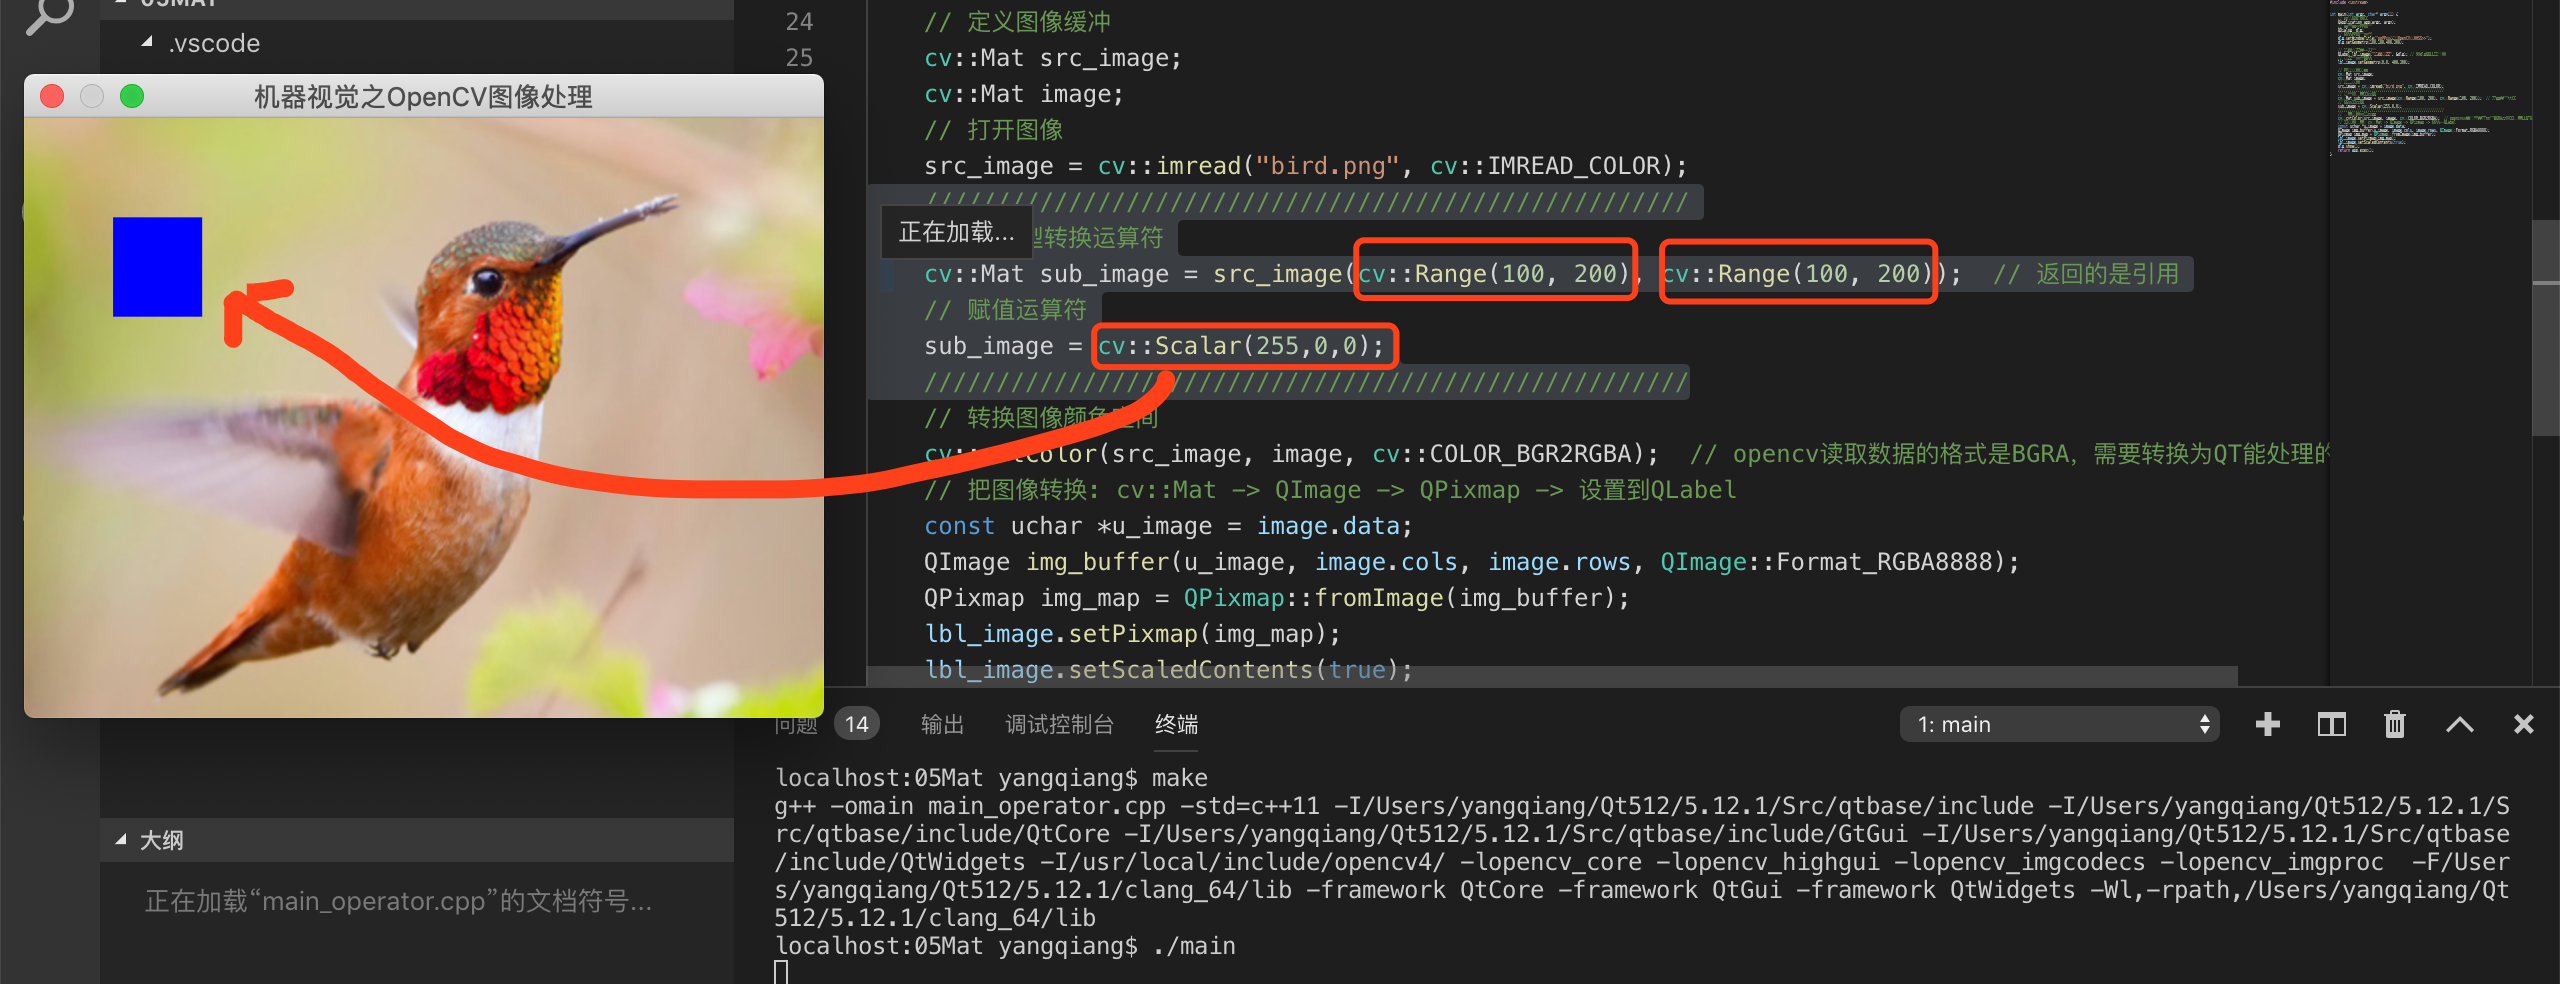

# 矩阵操作

## 数据操作

### 拷贝与克隆

```C++
    void 	copyTo (OutputArray m) const 
    void 	copyTo (OutputArray m, InputArray mask) const

    Mat 	clone () const CV_NODISCARD
```

### 修改值

```C++
    Mat & 	setTo (InputArray value, InputArray mask=noArray())
```

### 添加与删除值

```C++
    void 	pop_back (size_t nelems=1)
    void 	push_back (const _Tp &elem)

    template<typename _Tp > void 	push_back (const Mat_< _Tp > &elem)
    template<typename _Tp > void 	push_back (const std::vector< _Tp > &elem)
    void 	push_back (const Mat &m)
    void 	push_back_ (const void *elem)
```

### 变形

```C++

Mat 	reshape (int cn, int rows=0) const
Mat 	reshape (int cn, int newndims, const int *newsz) const 
Mat 	reshape (int cn, const std::vector< int > &newshape) const
```

### 改变大小

```C++
void 	resize (size_t sz) 
void 	resize (size_t sz, const Scalar &s)
    // const Scalar &s是变大后，新空间的填充值
```

## 矩阵运算操作

- 下面这些运算，属于基本常识，不具体介绍。

### 矩阵乘法

```C++
    MatExpr 	mul (InputArray m, double scale=1) const
```

### 向量点积

```C++
    double 	dot (InputArray m) const
```

### 叉积

```C++
    Mat 	cross (InputArray m) const
```

### 逆矩阵

```C++
    MatExpr 	inv (int method=DECOMP_LU) const
```

### 矩阵转置

```C++
    MatExpr 	t () const
```

### 关于MatExpr

- 这是一个正经的矩阵表示。
    - Mat不太正经是因为Mat表示是数组，包含向量，多维数组，矩阵等。
   

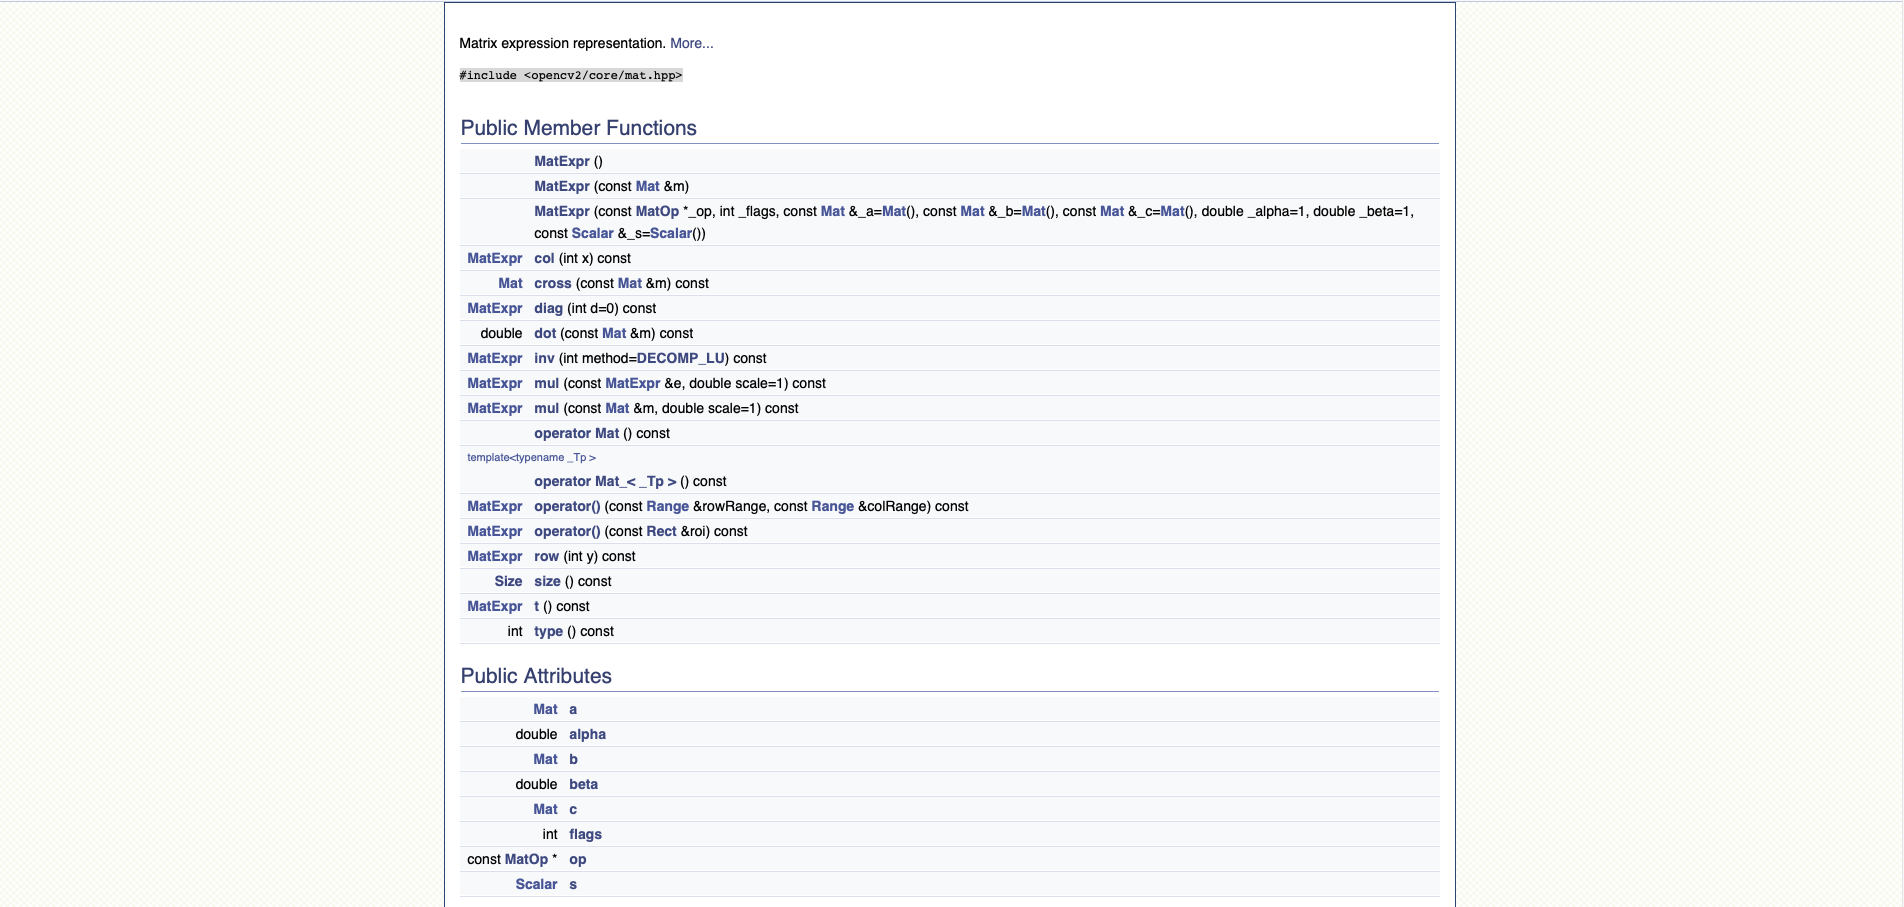

## 初始化与释放操作

### 分配

```C++
    void 	create (Size size, int type)
    void 	create (int ndims, const int *sizes, int type)
    void 	create (const std::vector< int > &sizes, int type)

```

### 释放

```C++
    void 	deallocate ()  // 内部调用，一般使用release
    void 	release ()
```

# 工具函数

- 从来创建单位矩阵，零矩阵什么的。

## 创建单位矩阵

```C++
    static MatExpr 	eye (int rows, int cols, int type)
    static MatExpr 	eye (Size size, int type)
```

## 创建对角矩阵
```C++
    static Mat 	diag (const Mat &d) 
```

## 创建1矩阵
```C++
    static MatExpr 	ones (int rows, int cols, int type)
    static MatExpr 	ones (Size size, int type)
    static MatExpr 	ones (int ndims, const int *sz, int type)
```

## 创建零矩阵
```C++
    static MatExpr 	zeros (int rows, int cols, int type) 
    static MatExpr 	zeros (Size size, int type)
    static MatExpr 	zeros (int ndims, const int *sz, int type)
```

----

# 附录：

- 参考文档：
    - `https://docs.opencv.org/4.1.2/d3/d63/classcv_1_1Mat.html`

- Mat的支持的数据类型：
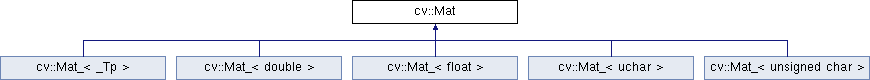

- 与Mat相关的还有：
    1. 关联的基本结构，比如cv::Vec，cv::Point3等。
    2. 关联的工具函数，比如求解方程等，特征值求解，奇异值分解等。
    3. 硬件加速函数；
    4. 与OpenGL与DirectX的数据结构转换函数；

- 两个独特的构造器
    - 列表初始化器：
        1. ` Mat (const std::initializer_list< _Tp > list)`
        2. `Mat (const std::initializer_list< int > sizes, const std::initializer_list< _Tp > list)`
    - 逗号初始化器：
        1. `Mat (const MatCommaInitializer_< _Tp > &commaInitializer)`

- 独特构造器使用例子：

```C++
    #include <opencv2/opencv.hpp>

    int main(int argc, char* argv[]) {
        // 初始化列表
        std::initializer_list<int> v1 = {1,2,3,4};
        cv::Mat m1(v1);
        cv::Mat m2({1,2,3,4,5});

        cv::Mat_<int> m3={1,2,3,4};  // 这种方式对Mat错误（语法没有问题），但是要求显式选择构造器（模板类型歧义造成）

        // MatCommaInitializer_ 必须由矩阵产生
        cv::Mat M = (cv::Mat_<int>(3,3) << 1, 0, 0, 0, 1, 0, 0, 0, 1);
        return 0;
    }

```

----